# Kick Starter Prediction with Decision Tree

## Data summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
)
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

data_frame = pd.read_csv("ks-projects-201801.csv")
data_frame.shape

(378661, 15)

In [2]:
data_frame.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
data_frame.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Dealing with Missing Value

In [4]:
data_frame.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
# Missing Value: usd pledged (pad: Propagate last valid observation forward to next valid)
data_frame["usd pledged"].fillna(method="pad", inplace=True)
# Missing Value: name
data_frame.dropna(axis=0, inplace=True)
data_frame.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## Data insight

### Project state

In [6]:
state = data_frame["state"].value_counts(normalize=True)
state

failed        0.522151
successful    0.353766
canceled      0.102412
undefined     0.009407
live          0.007392
suspended     0.004872
Name: state, dtype: float64

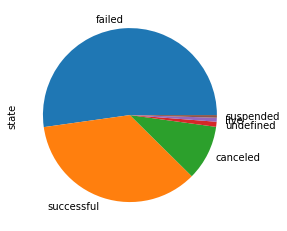

In [7]:
state.plot(kind="pie")

## Data Pre-process

### Applying the label encoder on our data to get a categorizal values

In [8]:
encoder_state = LabelEncoder().fit(data_frame["state"])
before_state = encoder_state.classes_
after_state = encoder_state.transform(before_state)
state_dict = dict(zip(after_state, before_state))

data_frame["state"] = LabelEncoder().fit_transform(data_frame["state"])

data_frame["country"] = LabelEncoder().fit_transform(data_frame["country"])

data_frame["category"] = LabelEncoder().fit_transform(data_frame["category"])

data_frame["main_category"] = LabelEncoder().fit_transform(data_frame["main_category"])

data_frame["currency"] = LabelEncoder().fit_transform(data_frame["currency"])

### Corrolation between the features and label class

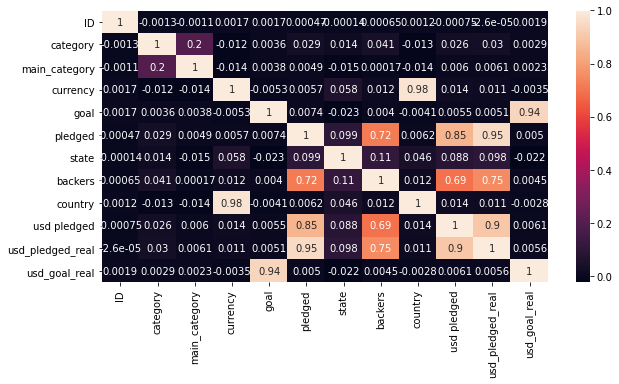

In [9]:
plt.figure(figsize=(10, 5))
corr = data_frame.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Building Machine Learning Model

In [10]:
data_frame.set_index(data_frame["name"], inplace=True, drop=True)
data_frame.drop(["ID", "name"], axis=1, inplace=True)
data_frame.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
name,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,1,0,9,0.0,0.0,1533.95
Greeting From Earth: ZGAC Arts Capsule For ET,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,1,15,22,100.0,2421.0,30000.00
Where is Hank?,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,1,3,22,220.0,220.0,45000.00
ToshiCapital Rekordz Needs Help to Complete Album,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,1,22,1.0,1.0,5000.00
Community Film Project: The Art of Neighborhood Filmmaking,55,6,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,22,1283.0,1283.0,19500.00


### X: Input, data except for "state", "deadline" and "launched".
### Y: Ouput, project state.

In [11]:
features = data_frame.drop(["state", "deadline", "launched"], axis=1)
X = np.asarray(features)
X

array([[1.08000e+02, 1.20000e+01, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.53395e+03],
       [9.30000e+01, 6.00000e+00, 1.30000e+01, ..., 1.00000e+02,
        2.42100e+03, 3.00000e+04],
       [9.30000e+01, 6.00000e+00, 1.30000e+01, ..., 2.20000e+02,
        2.20000e+02, 4.50000e+04],
       ...,
       [9.30000e+01, 6.00000e+00, 1.30000e+01, ..., 2.00000e+01,
        2.00000e+01, 1.50000e+04],
       [1.38000e+02, 1.30000e+01, 1.30000e+01, ..., 2.00000e+02,
        2.00000e+02, 1.50000e+04],
       [9.80000e+01, 0.00000e+00, 1.30000e+01, ..., 5.24000e+02,
        5.24000e+02, 2.00000e+03]])

In [12]:
y = np.asarray(data_frame["state"]).reshape(-1, 1)
y.shape

(378657, 1)

### Dealing with imbalanced dataset with SMOTE
(Reference: [SMOTE + ENN : 解決數據不平衡建模的採樣方法](https://medium.com/%E6%95%B8%E5%AD%B8-%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E8%88%87%E8%9F%92%E8%9B%87/smote-enn-%E8%A7%A3%E6%B1%BA%E6%95%B8%E6%93%9A%E4%B8%8D%E5%B9%B3%E8%A1%A1%E5%BB%BA%E6%A8%A1%E7%9A%84%E6%8E%A1%E6%A8%A3%E6%96%B9%E6%B3%95-cdb6324b711e))

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
x_resample, y_resample = sm.fit_resample(X=X, y=y)

### Split dataset to train (70%) / test (30%)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x_resample, y_resample, test_size=0.2, random_state=0
)
print(f"The shape of x_train : {str(x_train.shape)}")
print(f"The size of x_train : {str(x_train.shape[0])}")
print(f"The shape of x_test : {str(x_test.shape)}")
print(f"The size of x_x_test : {str(x_test.shape[0])}")

The shape of x_train : (949036, 10)
The size of x_train : 949036
The shape of x_test : (237260, 10)
The size of x_x_test : 237260


### Pre-Processing

In [15]:
scale = StandardScaler().fit(x_train)
scaled_train = scale.transform(x_train)
scaled_test = scale.transform(x_test)

### Training and predict the  dataset with Decision Tree

In [20]:
DT_clf = DecisionTreeClassifier(random_state=0).fit(scaled_train, y_train)
y_predict = DT_clf.predict(scaled_test)
print(f"Accuracy of the training model: {str(DT_clf.score(scaled_train, y_train))}")
print(f"Accuracy of the model: {str(accuracy_score(y_true=y_test, y_pred=y_predict))}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_predict))}")

Accuracy of the training model: 0.9847603252142174
Accuracy of the model: 0.8791663154345444
RMSE: 0.6986155792395896


### Decision Tree look-like

[Text(125.30238288753684, 215.12680851063828, 'X[5] <= -0.117\ngini = 0.833\nsamples = 949036\nvalue = [157928, 158283, 158178, 158405, 157968, 158274]'),
 Text(55.75385979427424, 210.50042553191489, 'X[7] <= -0.094\ngini = 0.64\nsamples = 285843\nvalue = [42995, 31003, 17725, 100, 35746, 158274]'),
 Text(43.32872452907624, 205.8740425531915, 'X[8] <= -0.106\ngini = 0.781\nsamples = 148751\nvalue = [42805, 30765, 17476, 17, 35671, 22017]'),
 Text(19.212700305818725, 201.2476595744681, 'X[9] <= -0.039\ngini = 0.752\nsamples = 133025\nvalue = [42801, 30755, 17476, 0, 35671, 6322]'),
 Text(1.5870148536752733, 196.6212765957447, 'X[1] <= -2.343\ngini = 0.585\nsamples = 13837\nvalue = [3017, 2192, 550, 0, 8078, 0]'),
 Text(0.3600934141364394, 191.99489361702126, 'X[3] <= -0.042\ngini = 0.606\nsamples = 592\nvalue = [188, 313, 30, 0, 61, 0]'),
 Text(0.20461833691735673, 187.36851063829786, 'X[0] <= -1.487\ngini = 0.571\nsamples = 547\nvalue = [185, 301, 1, 0, 60, 0]'),
 Text(0.09055310613043

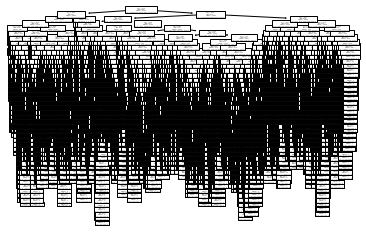

In [ ]:
plot_tree(DT_clf)

In [21]:
d = {"feature": features.columns, "importance": DT_clf.feature_importances_}
pd.DataFrame(data=d).sort_values(by=["importance"], ascending=False)

,feature,importance
5,backers,0.222762
7,usd pledged,0.172367
9,usd_goal_real,0.099757
1,main_category,0.097331
3,goal,0.096399
8,usd_pledged_real,0.088054
0,category,0.085796
4,pledged,0.075681
2,currency,0.031204
6,country,0.030649


## Prediction Summary

### Revert back to state

In [22]:
raw_y_test = []
raw_y_predict = []
for each in y_test:
    raw_y_test.append(state_dict[each])
for each in y_predict:
    raw_y_predict.append(state_dict[each])

In [23]:
classification_report(raw_y_test, raw_y_predict, output_dict=True)

{'accuracy': 0.8791663154345444,
 'canceled': {'f1-score': 0.7098729397737013,
  'precision': 0.7017065684468999,
  'recall': 0.71823162762642,
  'support': 39788},
 'failed': {'f1-score': 0.768574092801513,
  'precision': 0.7971014492753623,
  'recall': 0.7420181066619329,
  'support': 39433},
 'live': {'f1-score': 0.9104099292019928,
  'precision': 0.8990603960640213,
  'recall': 0.9220496737316,
  'support': 39538},
 'macro avg': {'f1-score': 0.8789957615557271,
  'precision': 0.8791039501209582,
  'recall': 0.8793589843250414,
  'support': 237260},
 'successful': {'f1-score': 0.9679141652829225,
  'precision': 0.9720362246337771,
  'recall': 0.9638269186741625,
  'support': 39311},
 'suspended': {'f1-score': 0.9182300972801271,
  'precision': 0.9059102928214671,
  'recall': 0.930889604508403,
  'support': 39748},
 'undefined': {'f1-score': 0.9989733449941062,
  'precision': 0.9988087694842225,
  'recall': 0.9991379747477308,
  'support': 39442},
 'weighted avg': {'f1-score': 0.8787

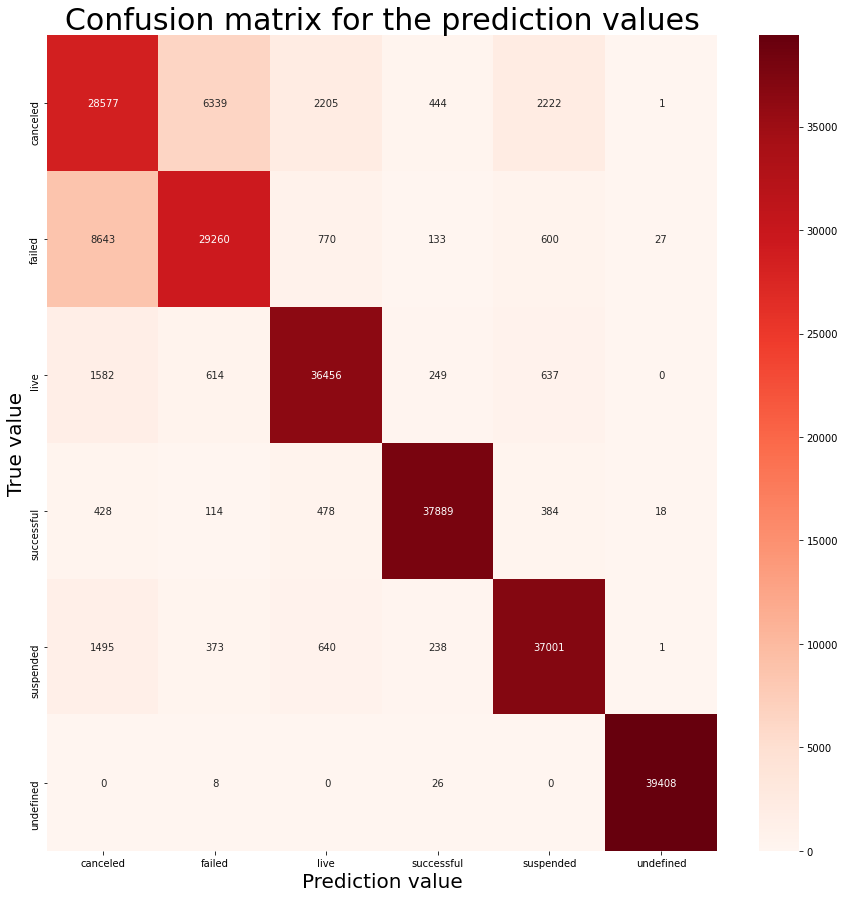

In [24]:
labels = list(state_dict.values())
fig = plt.figure(figsize=(15, 15))
cm = confusion_matrix(raw_y_test, raw_y_predict)
cm_df = pd.DataFrame(cm, labels, labels)
sns.heatmap(cm_df, fmt="2d", annot=True, cmap="Reds")
plt.xlabel("Prediction value", fontsize=20)
plt.ylabel("True value", fontsize=20)
plt.title("Confusion matrix for the prediction values", fontsize=30)
plt.show()